# Exploratory Analysis

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load files for analysis
results_df = pd.read_csv('../Resources/Dataset/results.csv')
races_df = pd.read_csv('../Resources/Dataset/races.csv')
laptimes_df = pd.read_csv('../Resources/Dataset/lap_times.csv')

# Join Tables

In [3]:
# Filter only first lap race position.  
firstlap_df = laptimes_df.loc[laptimes_df['lap']==1]

In [4]:
# Rename position column to firstlap_position.
firstlap_df = firstlap_df.rename(columns={'position': 'firstlap_position'})

In [5]:
# Rename position column to ending_position.
results_df = results_df.rename(columns={'position': 'ending_position'})

In [6]:
# Merge results_df with races_df on raceId.
results_df = (results_df.merge(races_df, left_on='raceId', right_on='raceId')
              .reindex(columns=['raceId', 'driverId', 'constructorId', 'ending_position', 'year', 'name']))
print(results_df.shape)
results_df.head()

(25040, 6)


,raceId,driverId,constructorId,ending_position,year,name
0,18,1,1,1,2008,Australian Grand Prix
1,18,2,2,2,2008,Australian Grand Prix
2,18,3,3,3,2008,Australian Grand Prix
3,18,4,4,4,2008,Australian Grand Prix
4,18,5,1,5,2008,Australian Grand Prix


In [7]:
# Merge results_df with firstlap_df on raceId and driverId.
results_df = (results_df.merge(firstlap_df, how='right', left_on=['raceId','driverId'], right_on=['raceId','driverId'])
              .reindex(columns=['raceId', 'driverId', 'constructorId', 'ending_position',
                                'year', 'name', 'lap', 'firstlap_position']))
print(results_df.shape)
results_df.head()

(9368, 8)


,raceId,driverId,constructorId,ending_position,year,name,lap,firstlap_position
0,841,20,9,1,2011,Australian Grand Prix,1,1
1,841,1,1,2,2011,Australian Grand Prix,1,2
2,841,17,9,5,2011,Australian Grand Prix,1,3
3,841,808,4,3,2011,Australian Grand Prix,1,4
4,841,13,6,7,2011,Australian Grand Prix,1,5


In [8]:
# Replace all \\N in ending_position column to 0.
results_df['ending_position'] = results_df['ending_position'].replace({'\\N':0})

# Convert ending_position from object to numeric.
results_df['ending_position'] = pd.to_numeric(results_df['ending_position'])

In [9]:
# Consider firstlap_position = 1.
results_df['firstlap_position']= results_df ['firstlap_position'].loc[results_df['firstlap_position']==1]
results_df.dropna().reset_index()

,index,raceId,driverId,constructorId,ending_position,year,name,lap,firstlap_position
0,0,841,20,9,1,2011,Australian Grand Prix,1,1.0
1,22,842,20,9,1,2011,Malaysian Grand Prix,1,1.0
2,46,843,18,1,4,2011,Chinese Grand Prix,1,1.0
3,70,844,20,9,1,2011,Turkish Grand Prix,1,1.0
4,93,845,4,6,5,2011,Spanish Grand Prix,1,1.0
...,...,...,...,...,...,...,...,...,...
453,9270,1047,830,9,1,2020,Abu Dhabi Grand Prix,1,1.0
454,9290,1052,830,9,2,2021,Bahrain Grand Prix,1,1.0
455,9309,1053,830,9,1,2021,Emilia Romagna Grand Prix,1,1.0
456,9328,1054,822,131,3,2021,Portuguese Grand Prix,1,1.0


In [10]:
# Define a function for ending_position.
def positions(ending_position,firstlap_position):
    if ((ending_position == 1) and (firstlap_position == 1)):
        return 'Winner'
    elif ((ending_position == 2) and (firstlap_position == 1)):
        return 'Podium'
    elif ((ending_position == 3) and (firstlap_position == 1)):
        return 'Podium'
    else:
        return 'No Podium'
results_df['firstlap_results'] = results_df.apply(lambda x: positions(x['ending_position'], x['firstlap_position']),axis=1)

In [11]:
# Drop the Nan values.
lap_results = results_df.dropna().reset_index()

In [12]:
# Lap results are saved as a firstlap_results.csv file.
lap_results.to_csv('../Resources/Dataset/firstlap_results.csv')

In [13]:
# Count the firstlap_results values.
first_lap_results = lap_results['firstlap_results'].value_counts()
first_lap_results

Winner       253
No Podium    106
Podium        99
Name: firstlap_results, dtype: int64

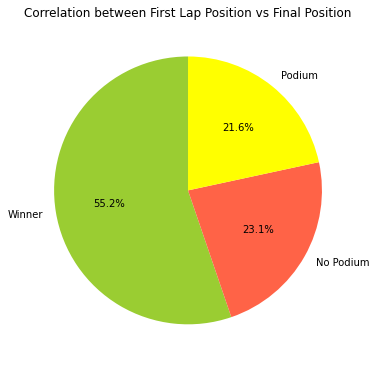

In [14]:
# Plot a pie chart
x = ['Winner', 'No Podium', 'Podium']
y = first_lap_results
colors = ['yellowgreen', 'tomato', 'yellow']
plt.subplots(figsize=(6, 8))
plt.pie(y, labels=x, startangle=90, colors=colors, autopct='%.1f%%')
plt.title('Correlation between First Lap Position vs Final Position')
plt.show()